 Prueba carga datos y gráficos

In [ ]:

!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-asefacz3
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-asefacz3
     |████████████████████████████████| 14.8MB 288kB/s 
     |████████████████████████████████| 10.9MB 20.0MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+50.gaa9f9c1-py2.py3-none-any.whl size=968780 sha256=e36b29cfdfec6609c99b32e85f2f0ba3f1ede37489b1a07ca1e557e27a8f0a74
  Stored in directory: /tmp/pip-ephem-wheel-cache-07bg_lep/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
G

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

Primero importo bibliotecas

In [ ]:

import seaborn as sns

%matplotlib inline

Muestro las primeras filas a ver como está

In [ ]:
ev = gpd.read_file("espacios_verdes.csv")
ev.head()

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja,geometry
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Esc. Scalabrini Ortiz,2,1658.266,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44536 -34.57925, -58.44489..."
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,,SIN NOMBRE,PLAZOLETA,NO,,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,,5,3.984,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44481 -34.57991, -58.44482..."
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,Polideportivo Colegiales,POLIDEPORTIVO COLEGIALES,PARQUE,NO,,Redigitalización por USIG en Agosto de 2017. U...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Polidep. Colegiales,6,4686.06,0.0,,,,,0.0,,,NO,,,,,"MULTIPOLYGON (((-58.44481 -34.57987, -58.44487..."
3,MULTIPOLYGON (((-58.4382360541145 -34.54616199...,,SIN NOMBRE,PLAZOLETA,NO,,ESPACIOS VERDES,USIG,USIG,"GUIRALDES, INTENDENTE - ESTACIONAMIENTO - PARQ...",,,,,,,BELGRANO,13.0,,,,,8,3746.965,100.0,,,,,,,,,,,,,"MULTIPOLYGON (((-58.43824 -34.54616, -58.43806..."
4,MULTIPOLYGON (((-58.4552876770316 -34.56223232...,Plaza Rafael Hernández,"HERNANDEZ, RAFAEL",PLAZA,SI,NO,,ESPACIOS VERDES,E.V.,"ECHEVERRIA - VUELTA DE OBLIGADO - MOM, POLICARPO",7.918,1975,32.256,1975,15.173,1975,BELGRANO,13.0,,,,Pza. Rafael Hernández,9,558.986,9990.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.45529 -34.56223, -58.45528..."


Le pido que me muestre los formatos de los datos de cada columna

In [ ]:
ev.dtypes

WKT                   object
nombre                object
nombre_ev             object
clasificac            object
patio_de_j            object
apadrinada            object
observacio            object
fuente_geo            object
fuente_ins            object
ubicacion             object
decreto               object
fecha_decr            object
ordenanza_            object
fecha_orde            object
boletin_of            object
fecha_bole            object
barrio                object
comuna                object
fech_padri            object
vig_padri             object
alc_conven            object
nom_mapa              object
id_ev_pub             object
area                  object
perimeter             object
DGEV_padri            object
mant_2017             object
tareas                object
estado                object
sup_total             object
canil                 object
posta_aero            object
etiqueta              object
reja                  object
horario_invier

Hago un gráfico de Area de EV en M2 por comuna

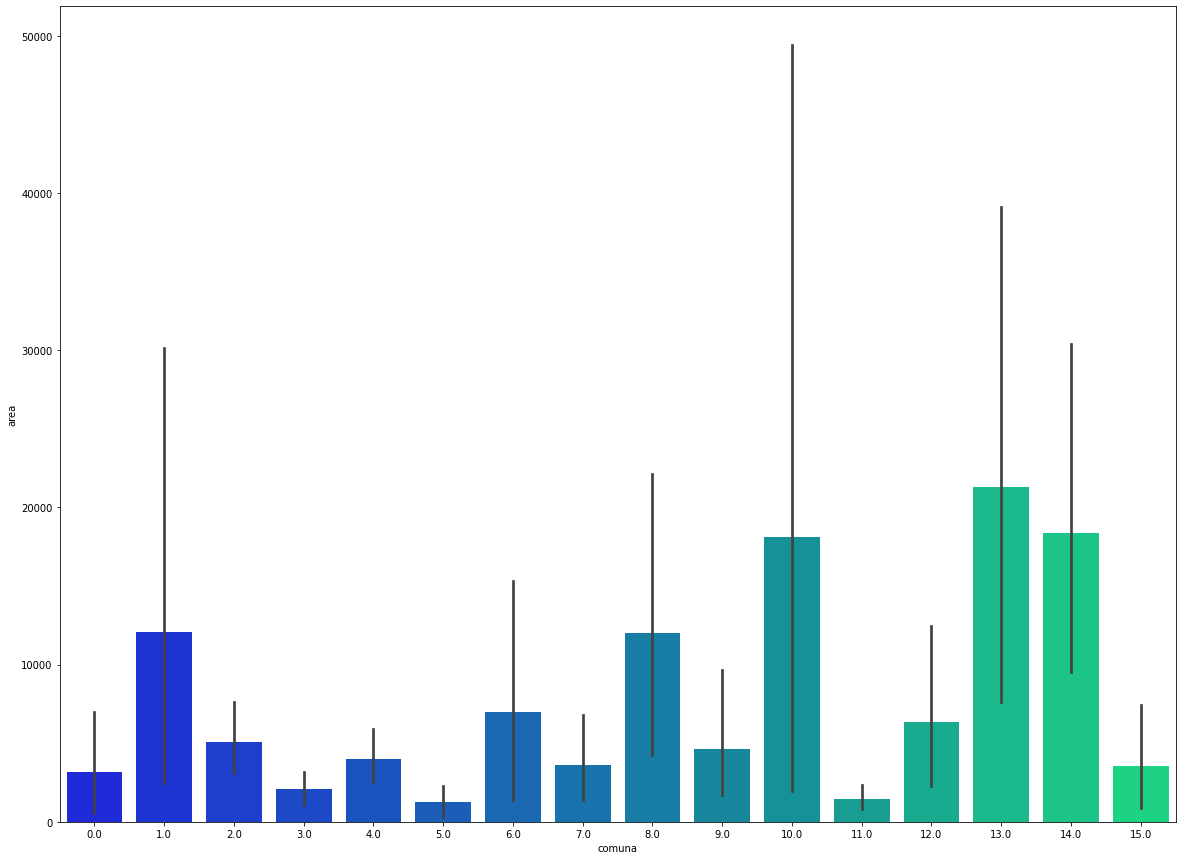

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.barplot(x = 'comuna', y = 'area', data = ev, palette="winter")

Hago un gráfico de Area de EV en M2 por Barrio

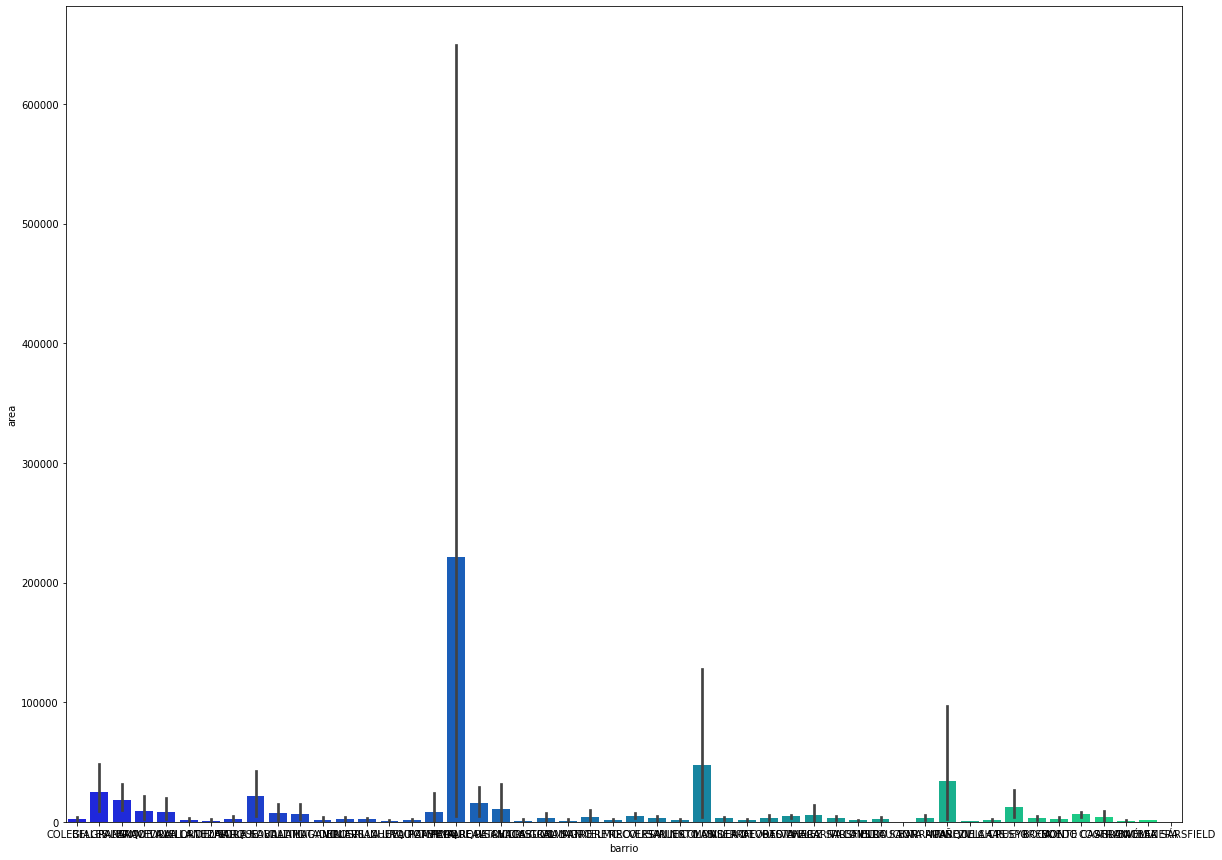

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.barplot(x = 'barrio', y = 'area', data = ev, palette="winter")

Hago un gráfico de Area de EV en M2 por tipo de EV

Hago un gráfico de cantidad de cada tipo de EV

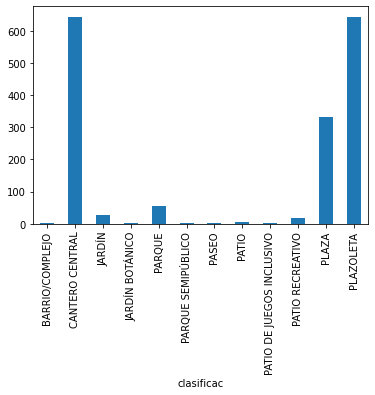

In [ ]:
ev.groupby("clasificac").area.count().plot(kind = "bar")

Aca lo mismo pero en tabla

In [ ]:
ev.groupby("clasificac").area.count()


clasificac
BARRIO/COMPLEJO                1
CANTERO CENTRAL              643
JARDÍN                        27
JARDÍN BOTÁNICO                1
PARQUE                        56
PARQUE SEMIPÚBLICO             4
PASEO                          2
PATIO                          5
PATIO DE JUEGOS INCLUSIVO      3
PATIO RECREATIVO              17
PLAZA                        333
PLAZOLETA                    644
Name: area, dtype: int64

Otra vez cantidad por tipo pero de otra manera

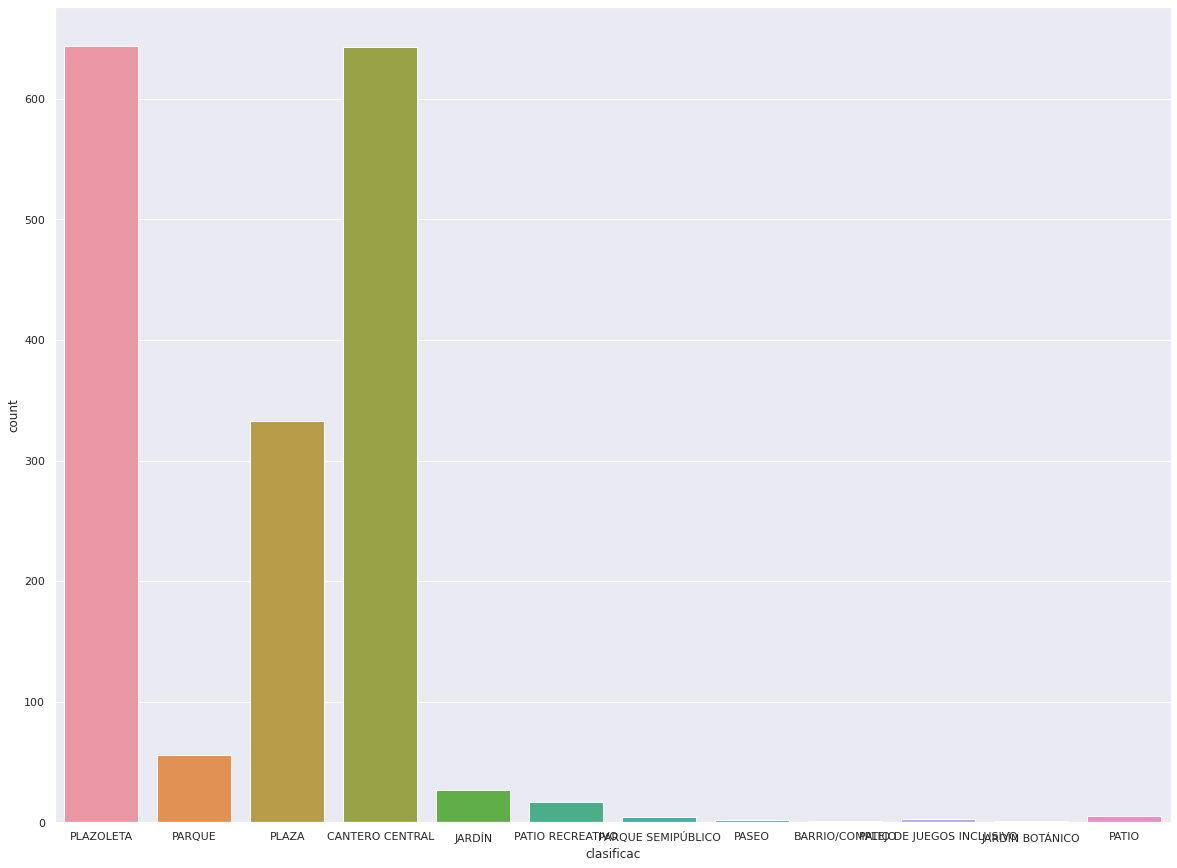

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.set(style="darkgrid")
ax = sns.countplot( x ='clasificac',  data = ev)
plt.show()

Intente sacar un promedio por tipo pero no estoy seguro si esta bien jeje

In [ ]:
ev.groupby("clasificac").area.mean()

clasificac
BARRIO/COMPLEJO              124739.144000
CANTERO CENTRAL                1730.119128
JARDÍN                        10924.726148
JARDÍN BOTÁNICO               49868.072000
PARQUE                       125268.356411
PARQUE SEMIPÚBLICO           834426.551250
PASEO                           529.673500
PATIO                           303.118000
PATIO DE JUEGOS INCLUSIVO       437.475667
PATIO RECREATIVO                854.428412
PLAZA                          7513.960703
PLAZOLETA                      2833.048635
Name: area, dtype: float64

y aca grafique lo anterior

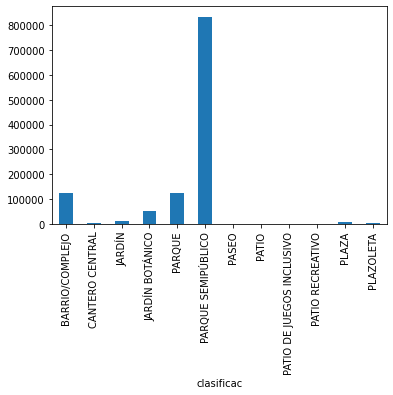

In [ ]:
ev.groupby("clasificac").area.mean().plot(kind = "bar")

https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB

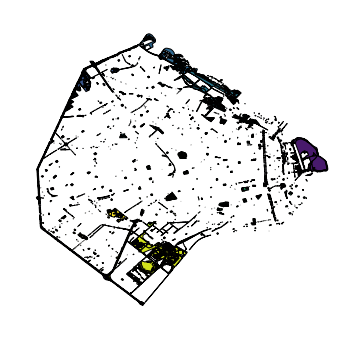

In [ ]:
gplt.choropleth(ev, hue = ev['comuna'])

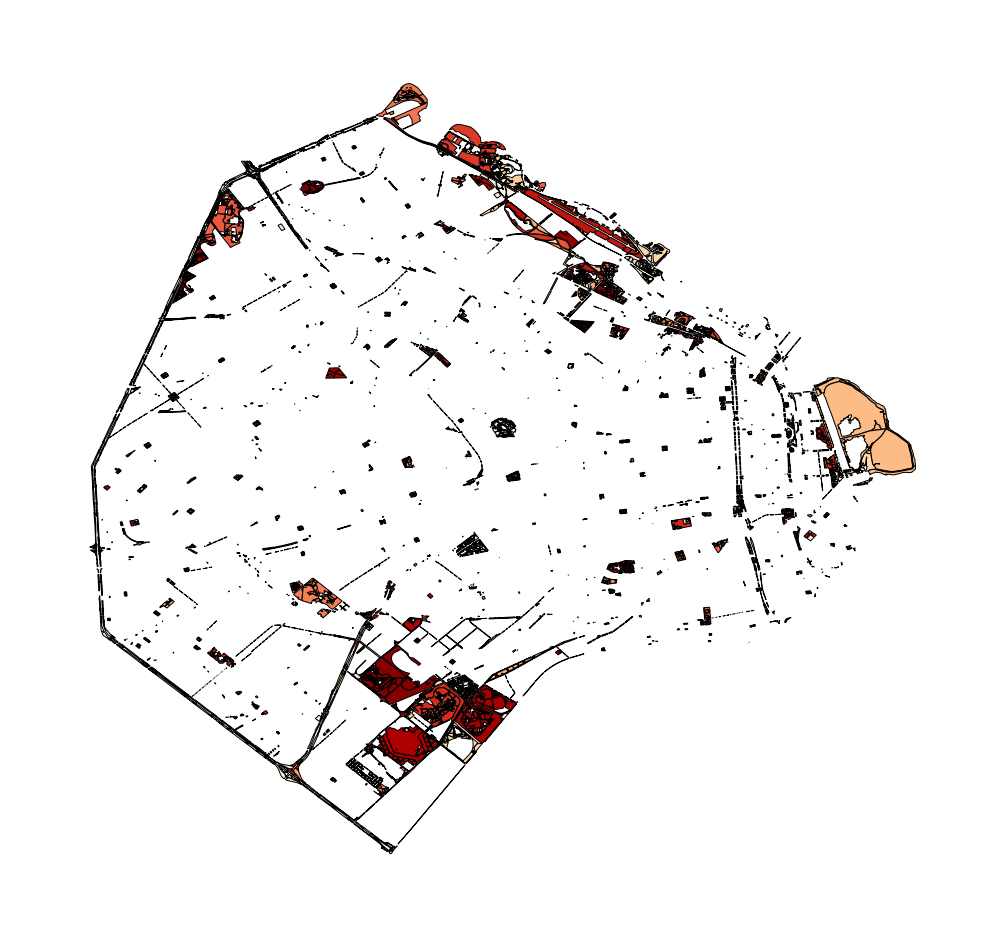

In [ ]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (21,17))